# 1) 
Consider the [cpus](https://r-data.pmagunia.com/dataset/r-dataset-package-mass-cpus) data from R package MASS. We will use linear regression to investigate the relationship between variables in this data set and estimated performance (variable **estperf**). Do not use published performance as a predictor of performance in this problem.

## a)  

Investigate the relationship between variables in the cpus dataset, both numerically and visually. Comment on the relationships you observe.

We can organize preliminary observations in terms of potential problems as follows:

1. Linearity of the response-predictor relationships
    - At first glance, it appears that the response-predictor relationships are linear. The predictors appear to be linked monotonically to the dependent variable. Additionally, many of the covariates are highly correlated to the response variable. For example, both `nmin` and `nmax` have above 80% Pearson correlation to the target.

2. Outliers
    - A visual inspection suggest outliers exist and a basic Grubbs test tells us each of the predictors have at least one outlier.

3. Collinearity
    - Preliminarily, there appears to be collinearity among the predictors. For example, the two covariates `nmin` and `nmax` are highly correlated to one another (~76% Pearson). We can later apply model diagnostics to confirm (e.g. VIF).

In [54]:
library(MASS)

In [55]:
head(cpus)

,name,syct,mmin,mmax,cach,chmin,chmax,perf,estperf
,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,ADVISOR 32/60,125,256,6000,256,16,128,198,199
2,AMDAHL 470V/7,29,8000,32000,32,8,32,269,253
3,AMDAHL 470/7A,29,8000,32000,32,8,32,220,253
4,AMDAHL 470V/7B,29,8000,32000,32,8,32,172,253
5,AMDAHL 470V/7C,29,8000,16000,32,8,16,132,132
6,AMDAHL 470V/8,26,8000,32000,64,8,32,318,290


In [56]:
perf = cpus$perf

In [57]:
# https://r-data.pmagunia.com/dataset/r-dataset-package-mass-cpus
data_dict <- list(
    "name"="manufacturer and model.",
    "syct"="cycle time in nanoseconds.",
    "mmin"="minimum main memory in kilobytes.",
    "mmax"="maximum main memory in kilobytes.",
    "cach"="cache size in kilobytes.",
    "chmin"="minimum number of channels.",
    "chmax"="maximum number of channels.",
    "perf"="published performance on a benchmark mix relative to an IBM 370/158-3.",
    "estperf"="estimated performance (by Ein-Dor & Feldmesser)."
)

In [58]:
drop <- c("perf", "name")
df = cpus[,!(names(cpus) %in% drop)]
df = na.omit(df)

In [59]:
str(df)

'data.frame':	209 obs. of  7 variables:
 $ syct   : int  125 29 29 29 29 26 23 23 23 23 ...
 $ mmin   : int  256 8000 8000 8000 8000 8000 16000 16000 16000 32000 ...
 $ mmax   : int  6000 32000 32000 32000 16000 32000 32000 32000 64000 64000 ...
 $ cach   : int  256 32 32 32 32 64 64 64 64 128 ...
 $ chmin  : int  16 8 8 8 8 8 16 16 16 32 ...
 $ chmax  : int  128 32 32 32 16 32 32 32 32 64 ...
 $ estperf: int  199 253 253 253 132 290 381 381 749 1238 ...


In [60]:
summary(df)

      syct             mmin            mmax            cach       
 Min.   :  17.0   Min.   :   64   Min.   :   64   Min.   :  0.00  
 1st Qu.:  50.0   1st Qu.:  768   1st Qu.: 4000   1st Qu.:  0.00  
 Median : 110.0   Median : 2000   Median : 8000   Median :  8.00  
 Mean   : 203.8   Mean   : 2868   Mean   :11796   Mean   : 25.21  
 3rd Qu.: 225.0   3rd Qu.: 4000   3rd Qu.:16000   3rd Qu.: 32.00  
 Max.   :1500.0   Max.   :32000   Max.   :64000   Max.   :256.00  
     chmin            chmax           estperf       
 Min.   : 0.000   Min.   :  0.00   Min.   :  15.00  
 1st Qu.: 1.000   1st Qu.:  5.00   1st Qu.:  28.00  
 Median : 2.000   Median :  8.00   Median :  45.00  
 Mean   : 4.699   Mean   : 18.27   Mean   :  99.33  
 3rd Qu.: 6.000   3rd Qu.: 24.00   3rd Qu.: 101.00  
 Max.   :52.000   Max.   :176.00   Max.   :1238.00  

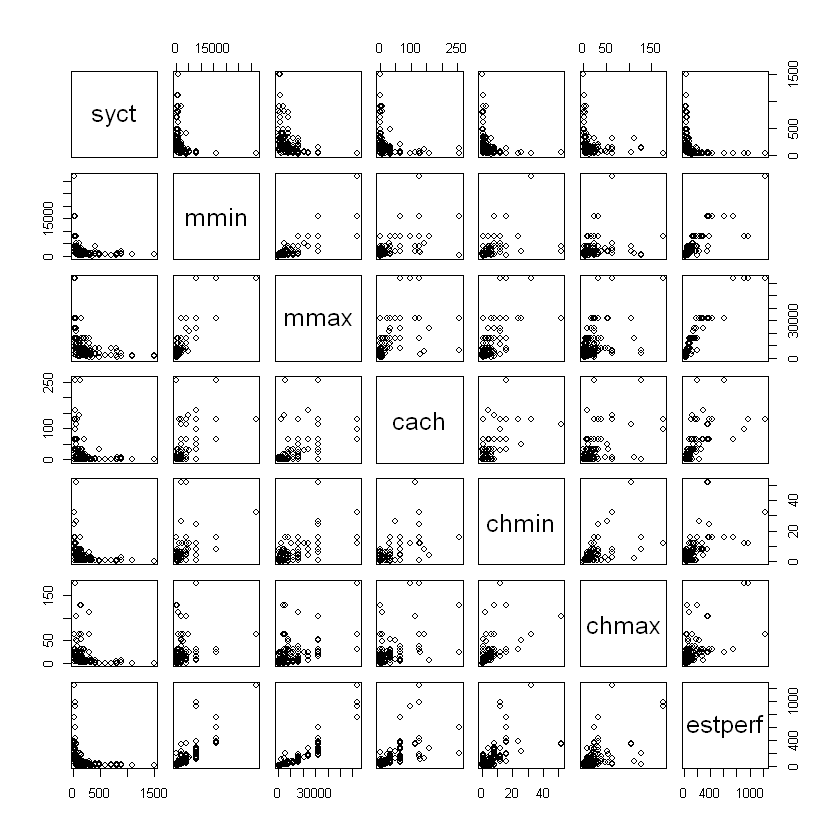

In [61]:
plot(df)

In [62]:
cor(df)

,syct,mmin,mmax,cach,chmin,chmax,estperf
syct,1.0000000,-0.3356422,-0.3785606,-0.3209998,-0.3010897,-0.2505023,-0.2883956
mmin,-0.3356422,1.0000000,0.7581573,0.5347291,0.5171892,0.2669074,0.8192915
mmax,-0.3785606,0.7581573,1.0000000,0.5379898,0.5605134,0.5272462,0.9012024
cach,-0.3209998,0.5347291,0.5379898,1.0000000,0.5822455,0.4878458,0.6486203
chmin,-0.3010897,0.5171892,0.5605134,0.5822455,1.0000000,0.5482812,0.6105802
chmax,-0.2505023,0.2669074,0.5272462,0.4878458,0.5482812,1.0000000,0.5921556
estperf,-0.2883956,0.8192915,0.9012024,0.6486203,0.6105802,0.5921556,1.0000000


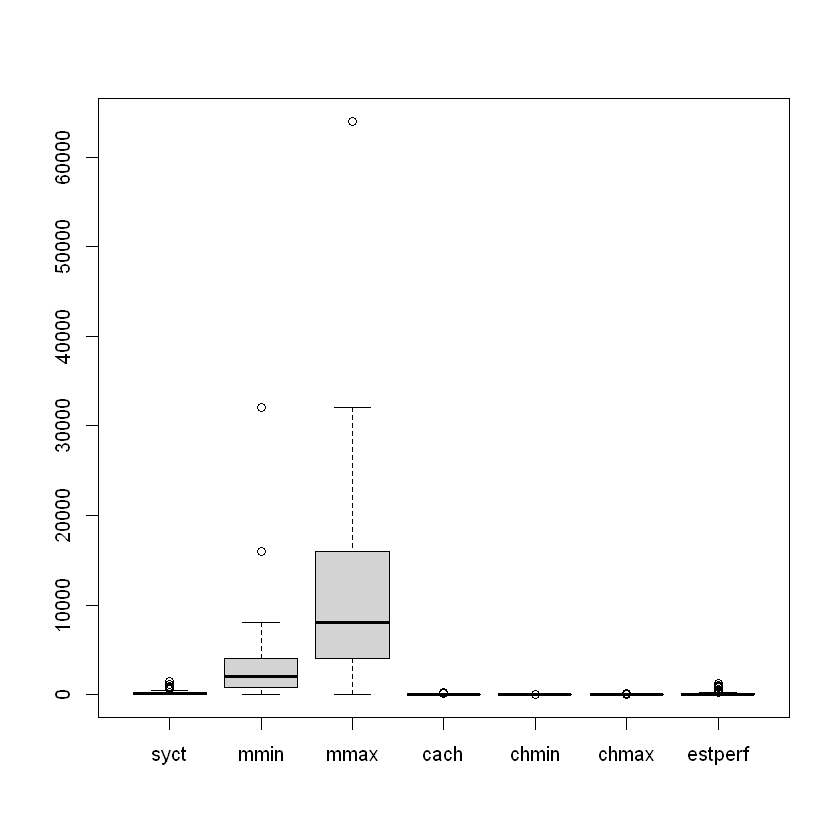

In [63]:
boxplot(df)#$out

In [64]:
options(scipen = 999)

In [65]:
library(outliers)

# When the p-value is less than 0.05, we will reject the null hypothesis 
# and conclude that the max value is an outlier.

for (n in names(df)) {
    print(n)
    print(grubbs.test(df[,n]))
}

[1] "syct"

	Grubbs test for one outlier

data:  df[, n]
G = 4.98026, U = 0.88018, p-value = 0.00002968
alternative hypothesis: highest value 1500 is an outlier

[1] "mmin"

	Grubbs test for one outlier

data:  df[, n]
G = 7.51069, U = 0.72749, p-value = 0.00000000000004641
alternative hypothesis: highest value 32000 is an outlier

[1] "mmax"

	Grubbs test for one outlier

data:  df[, n]
G = 4.45176, U = 0.90426, p-value = 0.0005379
alternative hypothesis: highest value 64000 is an outlier

[1] "cach"

	Grubbs test for one outlier

data:  df[, n]
G = 5.68057, U = 0.84412, p-value = 0.0000003452
alternative hypothesis: highest value 256 is an outlier

[1] "chmin"

	Grubbs test for one outlier

data:  df[, n]
G = 6.93949, U = 0.76737, p-value = 0.0000000000148
alternative hypothesis: highest value 52 is an outlier

[1] "chmax"

	Grubbs test for one outlier

data:  df[, n]
G = 6.06724, U = 0.82217, p-value = 0.00000002123
alternative hypothesis: highest value 176 is an outlier

[1] "estpe

## b)  
Use either methods commonly used in the book/lecture notes to build a linear regression model predicting estimated performance from predictors in the cpus dataset. Do not consider name in this modeling approach. Explain the process used to arrive at your final model.

- Although we don't have a large number of variables, many predictors appear to have a meaningful relationship to the dependent variable, and there appears to exist multicollinearity. Consequently, it could be useful to try a forward selection, beginning with the most highly associated independent variable. We can baseline the parsimonious model against a model that uses all predictors. However, first, we can measure and address outliers.

1. Toy model
1. Detect and address outliers
    - Calculate studentized residuals to detect and remove outliers
1. Create train and test data (holdout sample)
1. Create Parsimonious model (outliers removed)
1. Benchmark (all covariates)

In [66]:
# Toy model
model.1 <- lm(formula=estperf ~ mmax, data=df)
summary(model.1)


Call:
lm(formula = estperf ~ mmax, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-164.62  -32.33    1.82   25.82  517.79 

Coefficients:
               Estimate  Std. Error t value             Pr(>|t|)    
(Intercept) -40.9649633   6.6044920  -6.203        0.00000000297 ***
mmax          0.0118933   0.0003975  29.917 < 0.0000000000000002 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 67.23 on 207 degrees of freedom
Multiple R-squared:  0.8122,	Adjusted R-squared:  0.8113 
F-statistic:   895 on 1 and 207 DF,  p-value: < 0.00000000000000022


In [67]:
# Remove outliers by computing Studentized Residuals (p.97)
stud_resids <- studres(model.1)

if (length(df$stud_resids) == 0) {
   df <- cbind(df, stud_resids) 
}

head(df[order(-stud_resids),])

,syct,mmin,mmax,cach,chmin,chmax,estperf,stud_resids
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
10,23,32000,64000,128,32,64,1238,9.809533
200,30,8000,64000,128,12,176,978,4.201293
157,30,16000,32000,256,16,24,603,4.103819
199,30,8000,64000,96,12,176,919,3.184928
1,125,256,6000,256,16,128,199,2.548432
31,25,1310,2620,131,12,24,102,1.676685


In [68]:
# Observations whose studentized residuals are greater than 3 in absolute value are possible outliers (James et al., p97)
df_no = df[(stud_resids <= 3),]
df_no = df_no[,!(names(df_no) %in% c('stud_resids'))]

In [69]:
# In-sample and holdout

smp_size = floor(0.8 * nrow(df_no))
set.seed(123)

train_ind = sample(seq_len(nrow(df_no)), size = smp_size)
train = df_no[train_ind, ]
test = df_no[-train_ind, ]

length(train$mmax); length(test$mmax); length(df_no$mmax)

[1] 164

[1] 41

[1] 205

In [70]:
# Parsimonious
model.p <- lm(formula=estperf ~ mmax, data=train)
summary(model.p)


Call:
lm(formula = estperf ~ mmax, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-99.986 -20.396  -0.474  13.712 168.560 

Coefficients:
               Estimate  Std. Error t value             Pr(>|t|)    
(Intercept) -18.4676620   4.8773684  -3.786             0.000215 ***
mmax          0.0093579   0.0003161  29.605 < 0.0000000000000002 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 41.54 on 162 degrees of freedom
Multiple R-squared:  0.844,	Adjusted R-squared:  0.843 
F-statistic: 876.5 on 1 and 162 DF,  p-value: < 0.00000000000000022


In [71]:
# Benchmark
model.b <- lm(formula=estperf ~ syct+mmin+mmax+cach+chmin+chmax, data=train)
summary(model.b)


Call:
lm(formula = estperf ~ syct + mmin + mmax + cach + chmin + chmax, 
    data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-47.441 -11.002   0.124  10.519 203.930 

Coefficients:
               Estimate  Std. Error t value             Pr(>|t|)    
(Intercept) -31.1667671   3.9647147  -7.861   0.0000000000005704 ***
syct          0.0347948   0.0089045   3.908             0.000138 ***
mmin          0.0095530   0.0008923  10.706 < 0.0000000000000002 ***
mmax          0.0055150   0.0003135  17.591 < 0.0000000000000002 ***
cach          0.5419261   0.0640256   8.464   0.0000000000000171 ***
chmin         2.1105430   0.3806285   5.545   0.0000001219169864 ***
chmax         0.0366564   0.1080846   0.339             0.734953    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 23.66 on 157 degrees of freedom
Multiple R-squared:  0.9509,	Adjusted R-squared:  0.9491 
F-statistic: 507.1 on 6 and 157 DF,  p-value: < 0.00000000000000

As it turns out, our benchmark is performing much better than our parsimonious model. Residual error is lower and adjusted r-squared is significantly higher. As such, we should pivot to a backward elimination starting with the removal of attributes that have the least statistical significance.

In [72]:
library(leaps)
library(caret)

In [73]:
# k-fold cross-validation
train.control <- trainControl(method = "cv", number = 5)

step.model <- train(estperf ~., data = train,
                    method = "leapBackward", 
                    tuneGrid = data.frame(nvmax = 1:5),
                    trControl = train.control
                    )
step.model$results

,nvmax,RMSE,Rsquared,MAE,RMSESD,RsquaredSD,MAESD
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,41.57303,0.8541027,28.64359,8.489759,0.04902696,5.016707
2,2,35.42583,0.8954660,25.47897,10.261199,0.02628907,3.886233
3,3,28.83577,0.9447156,20.34058,13.027284,0.02550281,3.555228
4,4,24.86097,0.9608524,16.46462,12.645936,0.02117247,1.618655
5,5,23.89723,0.9638335,15.81578,12.364242,0.02051216,1.933833


In [74]:
step.model$bestTune

,nvmax
,<int>
5,5


In [75]:
summary(step.model$finalModel)

Subset selection object
6 Variables  (and intercept)
      Forced in Forced out
syct      FALSE      FALSE
mmin      FALSE      FALSE
mmax      FALSE      FALSE
cach      FALSE      FALSE
chmin     FALSE      FALSE
chmax     FALSE      FALSE
1 subsets of each size up to 5
Selection Algorithm: backward
         syct mmin mmax cach chmin chmax
1  ( 1 ) " "  " "  "*"  " "  " "   " "  
2  ( 1 ) " "  " "  "*"  "*"  " "   " "  
3  ( 1 ) " "  "*"  "*"  "*"  " "   " "  
4  ( 1 ) " "  "*"  "*"  "*"  "*"   " "  
5  ( 1 ) "*"  "*"  "*"  "*"  "*"   " "  

Our backward elimination confirms that the best model contains all predictors except `chmax` which had no statistical significance.

In [76]:
# Final model 
model.final <- lm(formula=estperf ~ syct+mmin+mmax+cach+chmin, data=train)
summary(model.final)


Call:
lm(formula = estperf ~ syct + mmin + mmax + cach + chmin, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-47.523 -11.425   0.072  10.695 203.826 

Coefficients:
               Estimate  Std. Error t value             Pr(>|t|)    
(Intercept) -30.8050424   3.8078482  -8.090  0.00000000000014842 ***
syct          0.0345708   0.0088551   3.904              0.00014 ***
mmin          0.0094835   0.0008660  10.951 < 0.0000000000000002 ***
mmax          0.0055284   0.0003102  17.824 < 0.0000000000000002 ***
cach          0.5464395   0.0624516   8.750  0.00000000000000304 ***
chmin         2.1660985   0.3426123   6.322  0.00000000252059746 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 23.6 on 158 degrees of freedom
Multiple R-squared:  0.9509,	Adjusted R-squared:  0.9493 
F-statistic: 611.9 on 5 and 158 DF,  p-value: < 0.00000000000000022


In [77]:
r2_score = function(y_true,y_pred){
  cor(y_true,y_pred)^2
}

mape = function(y_true, y_pred){
  mean(abs((y_true-y_pred)/y_true))*100
}

y_true = test$estperf
y_pred = predict(model.final, test[,!(names(test) %in% c('estperf'))])

r2_score(y_true, y_pred)
mape(y_true, y_pred)
100 - mape(y_true, y_pred)

[1] 0.9615621

[1] 32.57533

[1] 67.42467

## c)

Create a residual plot using this model and comment on it’s features. Do any of the assumptions of linear regression seem to be violated? What might be done to adjust our model? Adjust the model if necessary by considering various residual plots, updating the model, and assessing residual plots using the updated model.

1. *Non-linearity of the data*: Little pattern in the residuals indicates linearity
1. *Normality of residuals*: The distribution in the standardized residual should looks mostly normal and follows a straight path.
1. *Homogeneity of variance*: The Scale-Location plot approximates the spread of residuals. The spread points are well-spaced and equal. The line should is closer to horizontal. The plot suggests there exists equal variance among residuals (homoscedasticity). 
1. *Outliers and high-leverage points*: Although the points are clustered, nearly all points appear to be within Cook's distance (dotted red line) indicating that only a few points may merit removal.

Largely, our model does not violate any of the assumptions of linear regression. However, there are likely some outliers that can be removed.

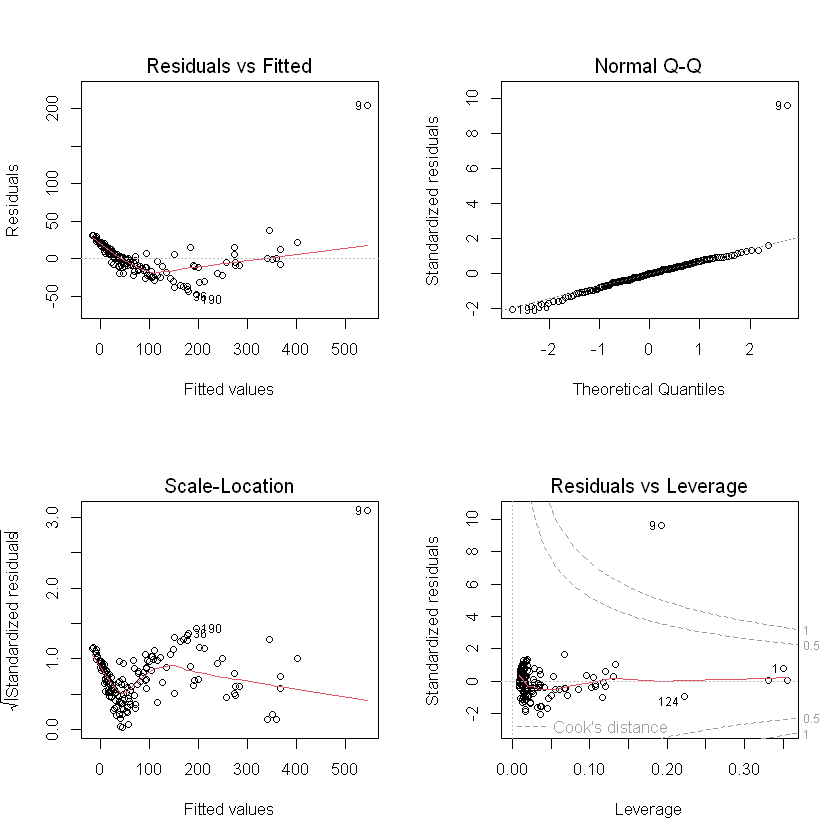

In [78]:
par(mfrow=(c(2,2)))
plot(model.final)

In [79]:
outlier(train)

syct    mmin    mmax    cach   chmin   chmax estperf 
   1500   16000   64000     256      52     128     749

In [80]:
stud_resids <- studres(model.final)

if (length(train$stud_resids) == 0) {
   train <- cbind(train, stud_resids) 
}

train2 = train[(stud_resids <= 3),]
train2 = train2[,!(names(train2) %in% c('stud_resids'))]

In [81]:
model.final.2 <- lm(formula=estperf ~ syct+mmin+mmax+cach+chmin, data=train2)
summary(model.final.2)


Call:
lm(formula = estperf ~ syct + mmin + mmax + cach + chmin, data = train2)

Residuals:
    Min      1Q  Median      3Q     Max 
-45.591  -8.253   0.130   9.804  49.064 

Coefficients:
               Estimate  Std. Error t value             Pr(>|t|)    
(Intercept) -21.1762024   2.5449893  -8.321   0.0000000000000398 ***
syct          0.0253225   0.0057573   4.398   0.0000200363242162 ***
mmin          0.0093865   0.0005598  16.768 < 0.0000000000000002 ***
mmax          0.0045465   0.0002111  21.540 < 0.0000000000000002 ***
cach          0.5908057   0.0404766  14.596 < 0.0000000000000002 ***
chmin         2.3855078   0.2219434  10.748 < 0.0000000000000002 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 15.25 on 157 degrees of freedom
Multiple R-squared:  0.973,	Adjusted R-squared:  0.9722 
F-statistic:  1133 on 5 and 157 DF,  p-value: < 0.00000000000000022


In [82]:
y_true = test$estperf
y_pred = predict(model.final.2, test[,!(names(test) %in% c('estperf'))])

r2_score(y_true, y_pred)
mape(y_true, y_pred)
100 - mape(y_true, y_pred)

[1] 0.9561082

[1] 23.59607

[1] 76.40393

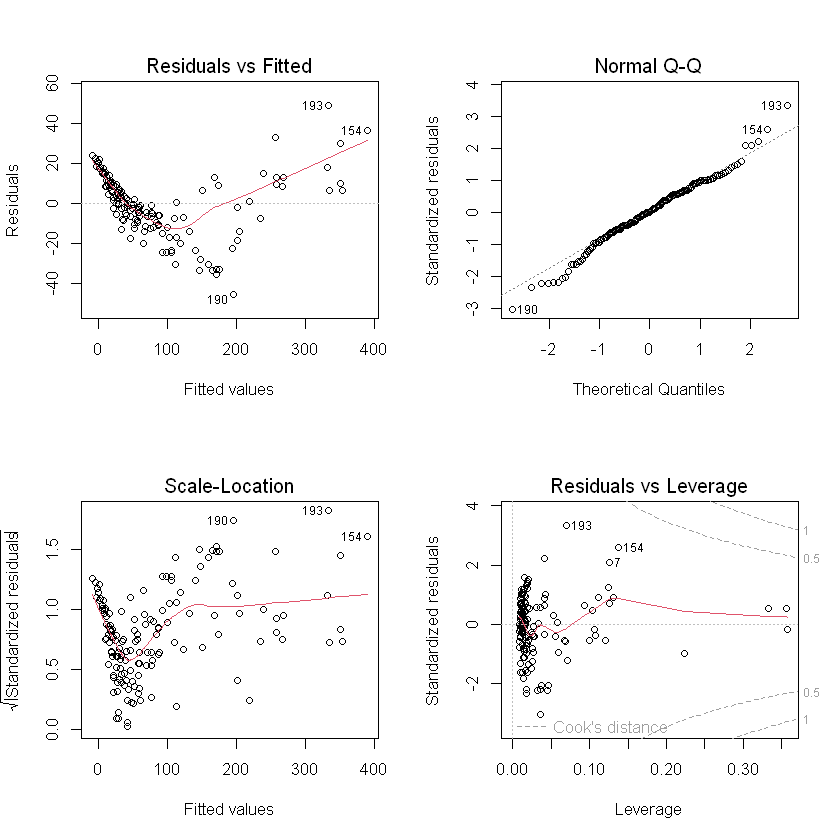

In [83]:
par(mfrow=(c(2,2)))
plot(model.final.2)

## d)  
How well does the final model fit the data? Comment on some model fit criteria from the model built in c)

#### Diagnostics

1. Non-linearity of the response-predictor relationships.
    - Although not obvious, a pattern is discernable in the residuals suggesting the problem may be non-linear. A two-way Kolmogorov-Smirnov test provides additional evidence.
2. Correlation of error terms.
    - A Durbin Watson test shows that there does exist correlation in the error terms. When there is correlation among the error terms, estimated standard errors will tend to underestimate the true standard errors (James et al., p.94). 
3. Non-constant variance of error terms.
    - A Breusch-Pagan test reveals homoscedasticity. There is constant variance in the errors.
4. Outliers.
    - Outliers were removed using studentized residuals.
5. High-leverage points.
    - All points are now within Cook's distance
6. Collinearity.
    - Variance-inflation factors suggest only a small amount of collinearity is present. Typically in practice there is a small amount of collinearity among the predictors. As a rule of thumb, a VIF value that exceeds 5 or 10 indicates a problematic amount of collinearity (James et al., p.102). In this case VIF scores are well below 5.
    
Overall, our model fits the holdout sample moderately well. The R^2 score indicates that 95% of the variance in the target can be explained by our predictors. General accuracy is ~76% and Mean Absolute Percentage error is at 23%. However, there could be some evidence of non-linearity which suggest that a more flexible approach may be appropriate. Additionally, as suggested, some small collinearity may have impact.

In [105]:
# install.packages('car')
library(car)

In [106]:
fit = model.final.2

In [107]:
?ks.test

In [108]:
y = test$estperf
X = test[,!(names(test) %in% c('estperf'))]

# The null hypothesis states that the relationship is linear, against the alternative hypothesis that it is not linear. 

# As the p-value is less than 0.05, we reject the null hypothesis 
# that the relationship is linear. 

ks.test(X,y)

Warning message in ks.test.default(X, y):
"p-value will be approximate in the presence of ties"



	Asymptotic two-sample Kolmogorov-Smirnov test

data:  X and y
D = 0.41463, p-value = 0.0000113
alternative hypothesis: two-sided


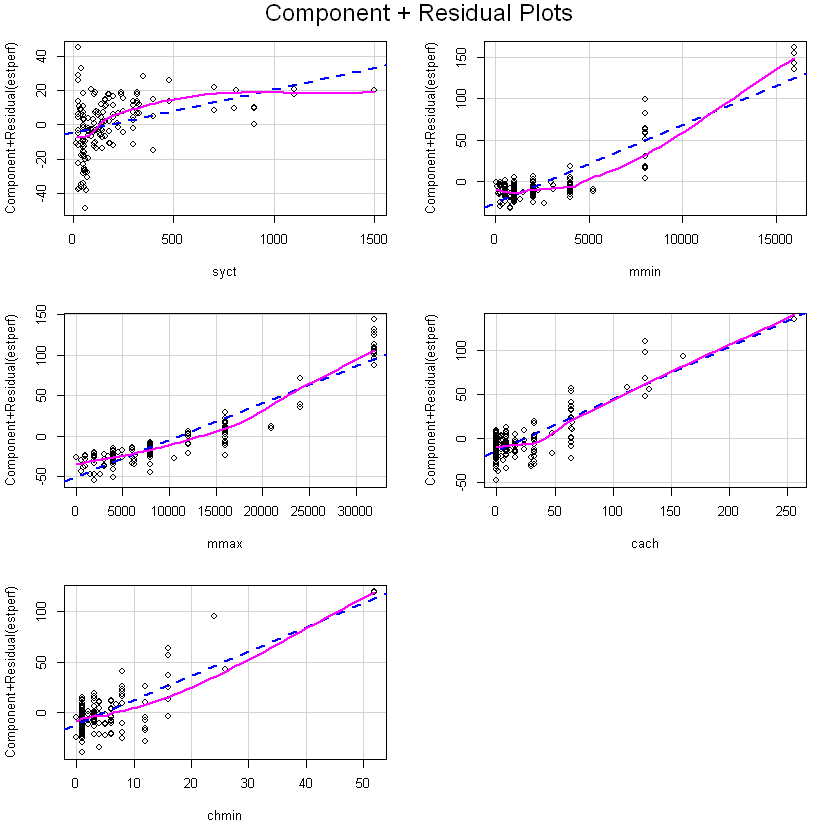

In [109]:
# 1. non-linearity
crPlots(fit)

In [110]:
?durbinWatsonTest

In [111]:
# 2. correlation of error terms

# H0 = no first order autocorrelation.
# H1 = first order correlation exists.

# As the p-value is greater than 0.05, we fail to reject the null hypothesis 
# that no first order autocorrelation exists. 

durbinWatsonTest(fit)

 lag Autocorrelation D-W Statistic p-value
   1      0.02780955      1.939192    0.67
 Alternative hypothesis: rho != 0

In [112]:
# 3. non-constant error variance (homoscedasticity)
# reject null hypothesis of constant-error variance 

ncvTest(fit) # Breusch-Pagain

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 42.12197, Df = 1, p = 0.000000000085755

No Studentized residuals with Bonferroni p < 0.05
Largest |rstudent|:
    rstudent unadjusted p-value Bonferroni p
193 3.449291         0.00072296      0.11784

193 190 
 34  85

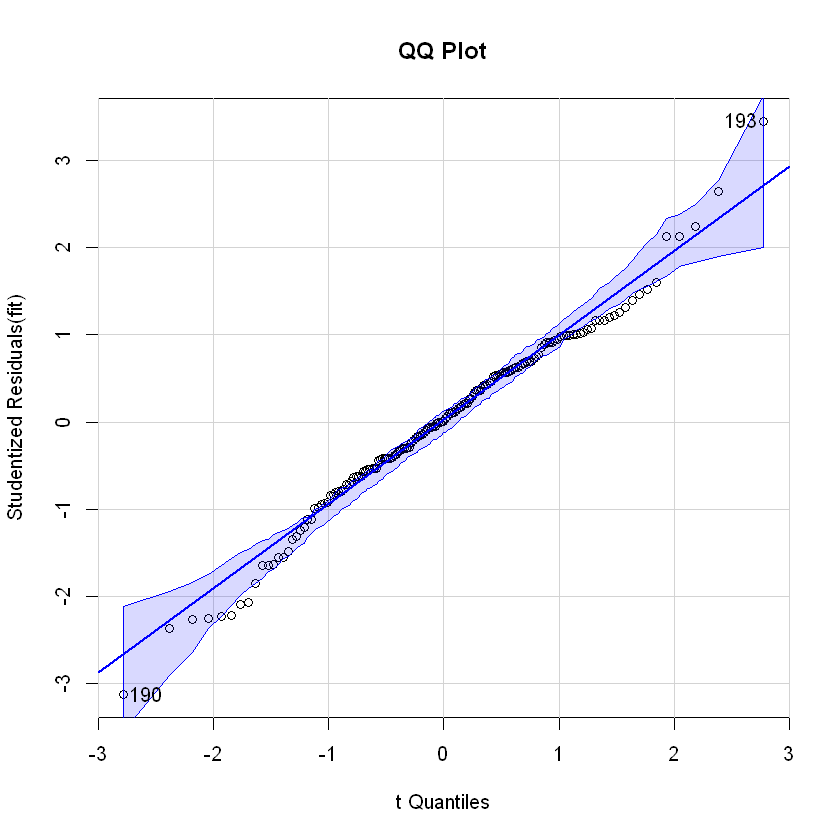

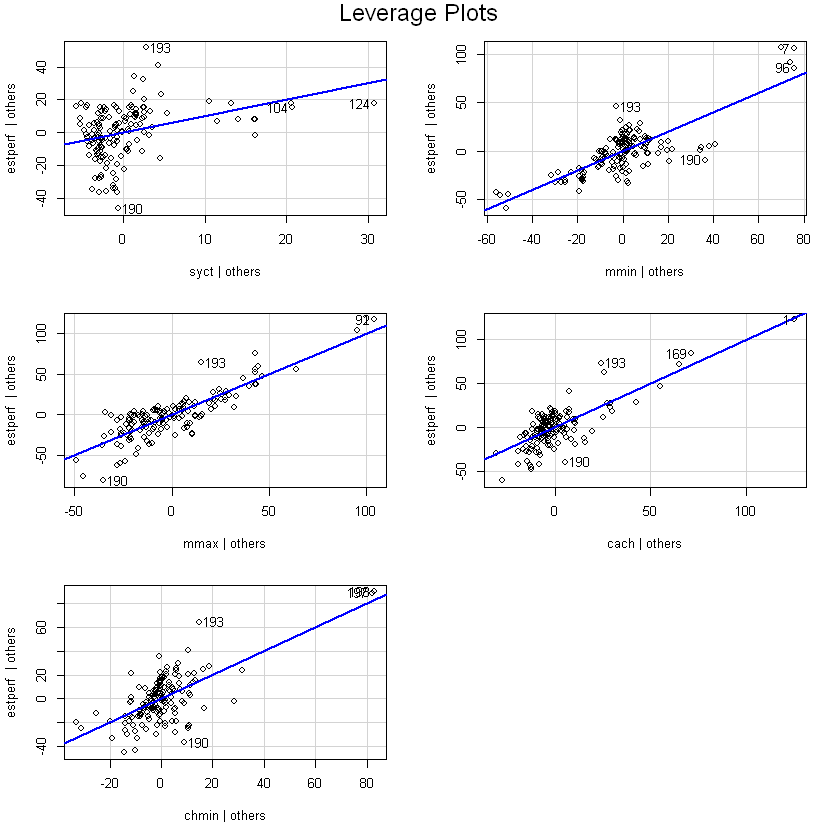

In [113]:
# 4. Outliers
outlierTest(fit) # Bonferonni p-value for most extreme obs
qqPlot(fit, main="QQ Plot") #qq plot for studentized resid
leveragePlots(fit) # leverage plots

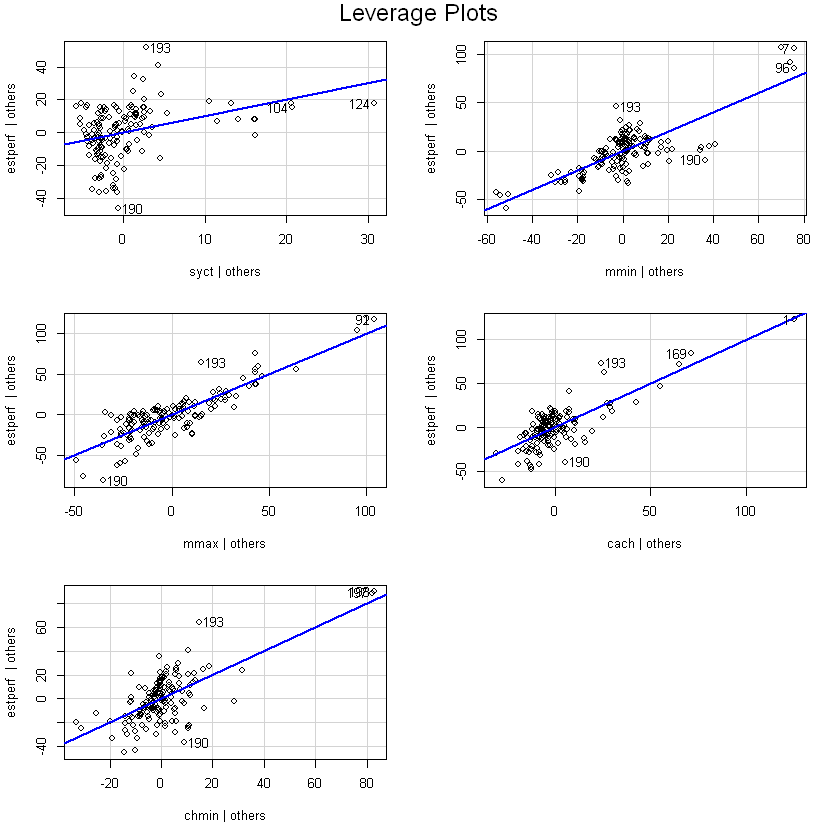

In [114]:
# high leverage points
leveragePlots(fit)

In [115]:
# 6. collinearity
vif(fit)
vif(fit) >= 5

syct     mmin     mmax     cach    chmin 
1.240641 2.300167 2.776346 1.611228 1.689003

syct  mmin  mmax  cach chmin 
FALSE FALSE FALSE FALSE FALSE

In [116]:
summary(fit)


Call:
lm(formula = estperf ~ syct + mmin + mmax + cach + chmin, data = train2)

Residuals:
    Min      1Q  Median      3Q     Max 
-45.591  -8.253   0.130   9.804  49.064 

Coefficients:
               Estimate  Std. Error t value             Pr(>|t|)    
(Intercept) -21.1762024   2.5449893  -8.321   0.0000000000000398 ***
syct          0.0253225   0.0057573   4.398   0.0000200363242162 ***
mmin          0.0093865   0.0005598  16.768 < 0.0000000000000002 ***
mmax          0.0045465   0.0002111  21.540 < 0.0000000000000002 ***
cach          0.5908057   0.0404766  14.596 < 0.0000000000000002 ***
chmin         2.3855078   0.2219434  10.748 < 0.0000000000000002 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 15.25 on 157 degrees of freedom
Multiple R-squared:  0.973,	Adjusted R-squared:  0.9722 
F-statistic:  1133 on 5 and 157 DF,  p-value: < 0.00000000000000022


## e)

Interpret all variables in your final model using complete sentences, making sure to account for the fact that this may be a multivariable model. Give interpretations in terms of as meaningful of units as possible (it may not be possible to use seconds for cycle time - the answer is too large, but you may use MB instead of kB, for instance). Adjust interpretations as needed, both for units, and the fact that our outcome has been log transformed (how do we get to the raw data values from a log transformation? Start by thinking: what is the inverse of the log function???)

I'm not sure how to answer this as I'm not familiar with this domain (cpu performance).

It is worth noting that all of the coefficients are positive which means that as the predictors increase, the mean of the response variable will also increase. For example, Cycle time has a coefficient of 0.025 which indicates that with each unit increase in estimated performance, cycle time should increase by a multiplier of 0.025 nanoseconds.

## f)  

Calculate indices that help assess multicollinearity between predictors in your final model. Is there evidence of multicollinearity? What does this imply, and should you take action? Take action if appropriate.
 - There is some small evidence of muticollinearity, but removing the correlated or partially correlated covariates does not yield improvement. Alternatively, we can create try linearly combining the correlated variables reducing each pair to a single variable. When aggregating all combinations which have high Pearson correlation, we observe a substantial increase in R^2 on the holdout sample, from 96% to ~99%. See `model.f3` and `model.f3a` below.

In [139]:
library(mctest)
omcdiag(fit)


Call:
omcdiag(mod = fit)


Overall Multicollinearity Diagnostics

                       MC Results detection
Determinant |X'X|:         0.1622         0
Farrar Chi-Square:       290.1532         1
Red Indicator:             0.4674         0
Sum of Lambda Inverse:     9.6174         0
Theil's Method:           -1.7058         0
Condition Number:          6.2382         0

1 --> COLLINEARITY is detected by the test 
0 --> COLLINEARITY is not detected by the test


In [140]:
imcdiag(fit)


Call:
imcdiag(mod = fit)


All Individual Multicollinearity Diagnostics Result

         VIF    TOL      Wi      Fi Leamer    CVIF Klein   IND1   IND2
syct  1.2406 0.8060  9.5053 12.7539 0.8978 -0.0209     0 0.0204 0.4436
mmin  2.3002 0.4348 51.3566 68.9089 0.6594 -0.0387     0 0.0110 1.2927
mmax  2.7763 0.3602 70.1657 94.1463 0.6002 -0.0467     0 0.0091 1.4632
cach  1.6112 0.6206 24.1435 32.3951 0.7878 -0.0271     0 0.0157 0.8676
chmin 1.6890 0.5921 27.2156 36.5172 0.7695 -0.0284     0 0.0150 0.9329

1 --> COLLINEARITY is detected by the test 
0 --> COLLINEARITY is not detected by the test

* all coefficients have significant t-ratios

R-square of y on all x: 0.973 

* use method argument to check which regressors may be the reason of collinearity

In [141]:
cor(train2)

,syct,mmin,mmax,cach,chmin,chmax,estperf
syct,1.0000000,-0.3568332,-0.4151836,-0.3169738,-0.2686883,-0.2242060,-0.3762403
mmin,-0.3568332,1.0000000,0.7445691,0.4276885,0.3911626,0.1405491,0.8362208
mmax,-0.4151836,0.7445691,1.0000000,0.4743414,0.5331640,0.3333229,0.9048274
cach,-0.3169738,0.4276885,0.4743414,1.0000000,0.5589129,0.4513714,0.6905778
chmin,-0.2686883,0.3911626,0.5331640,0.5589129,1.0000000,0.5870817,0.6828169
chmax,-0.2242060,0.1405491,0.3333229,0.4513714,0.5870817,1.0000000,0.4139004
estperf,-0.3762403,0.8362208,0.9048274,0.6905778,0.6828169,0.4139004,1.0000000


In [142]:
library(ppcor)
pcor(train2, method = "pearson")$p.value

,syct,mmin,mmax,cach,chmin,chmax,estperf
syct,0.000000000000,0.000075341950838023180993599514643221937149,0.000001361128275083757955101274039755310241162078455091,0.00004463939359237811501344983522443,0.02337366459839024940282,0.27318812277,0.000017370729069414575902741137980456187506206333637238
mmin,0.000075341951,0.000000000000000000000000000000000000000000,0.000000000073513726426187936350414853237111856287810951,0.00000000000123543663168571931482674,0.00000000118050894214021,0.01953908079,0.000000000000000000000000000000000006036856894022138899
mmax,0.000001361128,0.000000000073513726426181926361901053379455,0.000000000000000000000000000000000000000000000000000000,0.00000000000000000042764159036093497,0.00000002487864968937172,0.88432318550,0.000000000000000000000000000000000000000000000006431376
cach,0.000044639394,0.000000000001235436631685724363630997368890,0.000000000000000000427641590360965685030381067122107197,0.00000000000000000000000000000000000,0.00010529085723537043306,0.24903336581,0.000000000000000000000000000011707380534314271662132273
chmin,0.023373664598,0.000000001180508942140134127744832692741284,0.000000024878649689371446927701331253146577182633336633,0.00010529085723536746506141109636090,0.00000000000000000000000,0.00008786806,0.000000000000000075221390514947976046675193195767405996
chmax,0.273188122768,0.019539080790042802349137929240896482951939,0.884323185498585795372150641924235969781875610351562500,0.24903336581403176519522446596965892,0.00008786806377170568248,0.00000000000,0.460343919878218210683940014860127121210098266601562500
estperf,0.000017370729,0.000000000000000000000000000000000006036857,0.000000000000000000000000000000000000000000000006431376,0.00000000000000000000000000001170738,0.00000000000000007522139,0.46034391988,0.000000000000000000000000000000000000000000000000000000


In [162]:
library(glue)

score <- function (y_true, y_pred) {
    print(glue('R^2:  {r2_score(y_true, y_pred)}'))
    print(glue('MAPE: {mape(y_true, y_pred)}'))
}

In [167]:
model.f3 <- lm(formula=estperf ~ (syct*mmax*mmin) + (cach*chmin), data=train2)

summary(model.f3)

print('Holdout:')
score(
    test$estperf, 
    predict(model.f3, test[,!(names(test) %in% c('estperf'))])
)


Call:
lm(formula = estperf ~ (syct * mmax * mmin) + (cach * chmin), 
    data = train2)

Residuals:
     Min       1Q   Median       3Q      Max 
-24.9379  -3.7529   0.5502   3.3200  30.2698 

Coefficients:
                       Estimate       Std. Error t value             Pr(>|t|)
(Intercept)     5.9871597555858  1.7600466265832   3.402             0.000856
syct            0.0081916004665  0.0059363091903   1.380             0.169639
mmax            0.0040537143893  0.0001458443386  27.795 < 0.0000000000000002
mmin           -0.0039245027628  0.0008513702693  -4.610         0.0000084899
cach            0.4781420059349  0.0284036790855  16.834 < 0.0000000000000002
chmin           0.8608972659424  0.2497021552966   3.448             0.000732
syct:mmax      -0.0000024732802  0.0000009712799  -2.546             0.011878
syct:mmin       0.0000074218431  0.0000061416694   1.208             0.228754
mmax:mmin       0.0000004849211  0.0000000300848  16.118 < 0.0000000000000002
cach:chmin  

[1] "Holdout:"
R^2:  0.990370149861668
MAPE: 11.4483909455036


In [171]:
model.f3a <- lm(formula=estperf ~ mmax+mmin+cach+chmin+(syct*mmax)+(mmax*mmin)+(cach*chmin), data=train2)

summary(model.f3a)

print('Holdout:')
score(
    test$estperf, 
    predict(model.f3a, test[,!(names(test) %in% c('estperf'))])
)


Call:
lm(formula = estperf ~ mmax + mmin + cach + chmin + (syct * mmax) + 
    (mmax * mmin) + (cach * chmin), data = train2)

Residuals:
     Min       1Q   Median       3Q      Max 
-24.7085  -3.7535   0.2249   3.4829  30.6112 

Coefficients:
                  Estimate     Std. Error t value             Pr(>|t|)    
(Intercept)  5.38713719922  1.69544775288   3.177             0.001796 ** 
mmax         0.00404923332  0.00014099015  28.720 < 0.0000000000000002 ***
mmin        -0.00320771169  0.00069147634  -4.639         0.0000074331 ***
cach         0.47473447232  0.02830704467  16.771 < 0.0000000000000002 ***
chmin        0.85226152588  0.24783159748   3.439             0.000752 ***
syct         0.01357399759  0.00397918805   3.411             0.000826 ***
mmax:syct   -0.00000253876  0.00000079987  -3.174             0.001816 ** 
mmax:mmin    0.00000046189  0.00000002274  20.309 < 0.0000000000000002 ***
cach:chmin   0.01444746570  0.00245413483   5.887         0.0000000238 ***
---


[1] "Holdout:"
R^2:  0.990271113958651
MAPE: 11.4181682444285


## g) 

Are there any outliers or influential observations in this data? Calculate relevant indices or provide visualizations to justify your answer. Make sure to use rules of thumb discussed in class if necessary for interpretations.

    - As discussed, there were outliers in the data which were removed using the studentized residuals threshold

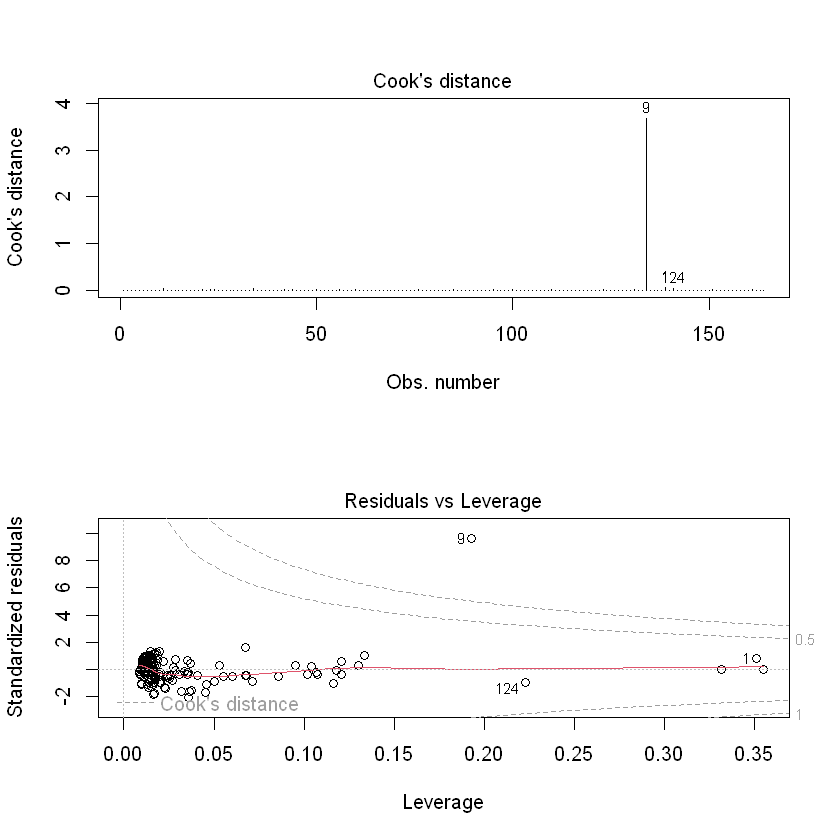

In [176]:
# before outlier removal
par(mfrow=(c(2,1)))
plot(model.final, 4)
plot(model.final, 5)

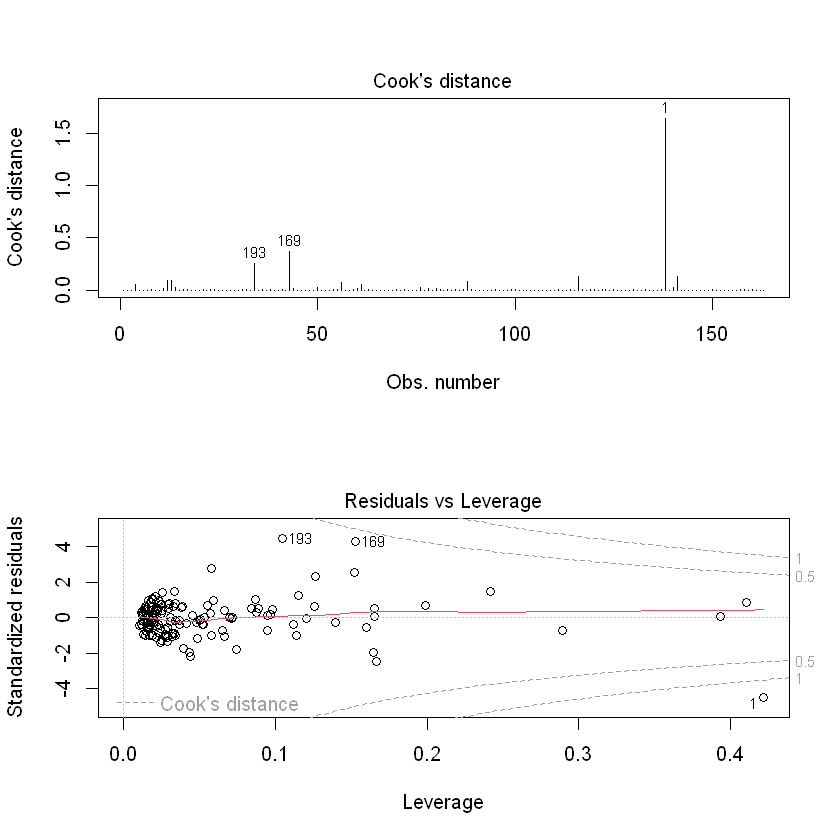

In [177]:
# after outlier removal 

par(mfrow=(c(2,1)))
plot(model.f3a, 4)
plot(model.f3a, 5)

# 2

Consider the birthwt data from R package MASS. We will investigate the relationship between low
birthweight and the predictors in the birthwt data using logistic regression and discriminant analysis.

a) Investigate the relationship between variables in the birthwt dataset. Do you see anything surprising?
Use both numeric and visual summaries. Create and comment on visualizations specifically between the
outcome variable and predictor/independent variables. Also, notice that qualitative/categorical variables
should be visualized in an alternative manner, not just scatterplots/correlations as in the case of
quantitative variables.

We can describe our findings in two parts: 

- Categorical
 - When we examine the distribution of categorical variables against the target, we find the following:
    1. race could be a determining factor - Surprisingly, we do observe that white families experience low birthweight less often than BAA and others. All circumstances being equal, I did not expect race would be a factor. However, underlying socio-economic inequity may be a part of the equation.
    1. smoke - Intuitively, smoking has a significant association to birthweight. Nearly 41% of moms who smoke give birth to underweight babies compared to only ~25% of those who don't.
    1. ht - Very similar to smoking, moms with a history of hypertension tend to be at higher risk. However, there does not appear to be a correlation between the two.
    1. ui - Suprisingly, the presence of uterine irritability has some association. Moms who do have ui tend to be at slightly lower risk.  
    1. ftv - it is difficult to tell wether or not number of visits has any association. Perhaps simplifying to two or three classes (e.g., too few, good amount) may help our analysis.
- Quantitative/Continuous
    1. lwt - The mother's weight does seem to have some association to the target.
    1. age - The association to age is difficult to measure. Especially, considering that the sample size only contains a few women over the age 30.
    

In [406]:
?birthwt

In [401]:
head(birthwt)

,low,age,lwt,race,smoke,ptl,ht,ui,ftv,bwt
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
85,0,19,182,2,0,0,0,1,0,2523
86,0,33,155,3,0,0,0,0,3,2551
87,0,20,105,1,1,0,0,0,1,2557
88,0,21,108,1,1,0,0,1,2,2594
89,0,18,107,1,1,0,0,1,0,2600
91,0,21,124,3,0,0,0,0,0,2622


In [415]:
cat <- c('low', 'race', 'smoke', 'ht', 'ui', 'ftv')

cats = birthwt[cat]
# head(cats)

In [416]:
library(gmodels)
for (n in names(cats[!names(cats) %in% c('low')])) {
    print(n)
    CrossTable(cats[[n]], cats$low, 
               digits=2, expected=FALSE, 
               prop.r=TRUE, prop.c=FALSE, 
               prop.t=FALSE, prop.chisq=FALSE, 
               sresid=FALSE, format=c("SPSS"))
}

[1] "race"

   Cell Contents
|-------------------------|
|                   Count |
|             Row Percent |
|-------------------------|

Total Observations in Table:  189 

             | cats$low 
   cats[[n]] |        0  |        1  | Row Total | 
-------------|-----------|-----------|-----------|
           1 |       73  |       23  |       96  | 
             |    76.04% |    23.96% |    50.79% | 
-------------|-----------|-----------|-----------|
           2 |       15  |       11  |       26  | 
             |    57.69% |    42.31% |    13.76% | 
-------------|-----------|-----------|-----------|
           3 |       42  |       25  |       67  | 
             |    62.69% |    37.31% |    35.45% | 
-------------|-----------|-----------|-----------|
Column Total |      130  |       59  |      189  | 
-------------|-----------|-----------|-----------|

 
[1] "smoke"

   Cell Contents
|-------------------------|
|                   Count |
|             Row Percent |
|--------

In [317]:
cor(cats)

,low,race,smoke,ht,ui
low,1.0000000,0.13779275,0.16140431,0.15237025,0.16904283
race,0.1377928,1.00000000,-0.33903074,0.01992992,0.05360209
smoke,0.1614043,-0.33903074,1.00000000,0.01340704,0.06215900
ht,0.1523702,0.01992992,0.01340704,1.00000000,-0.10858506
ui,0.1690428,0.05360209,0.06215900,-0.10858506,1.00000000


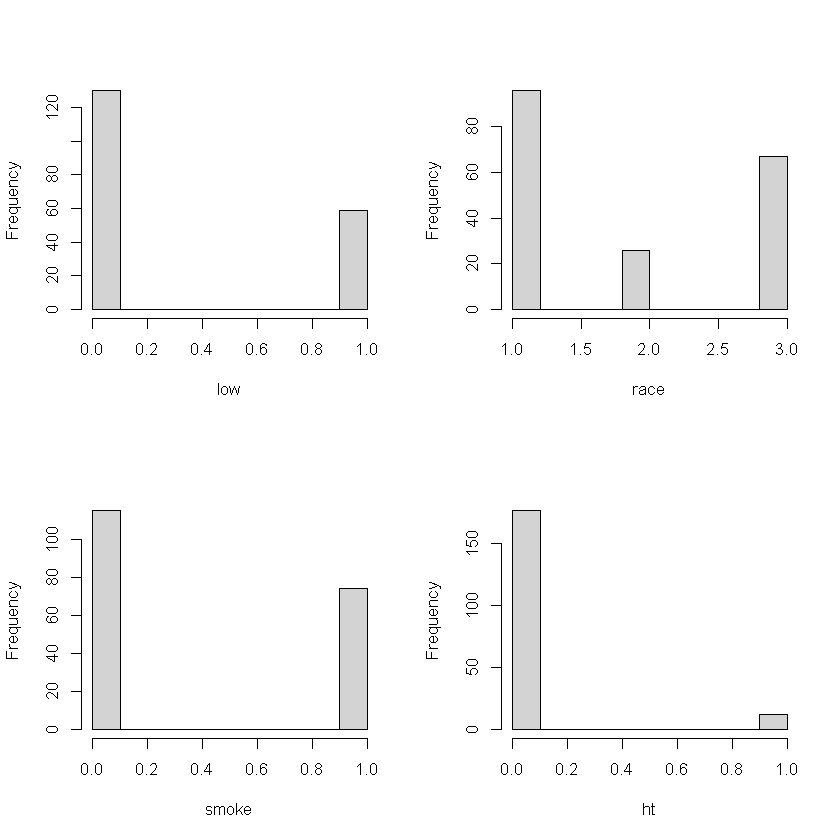

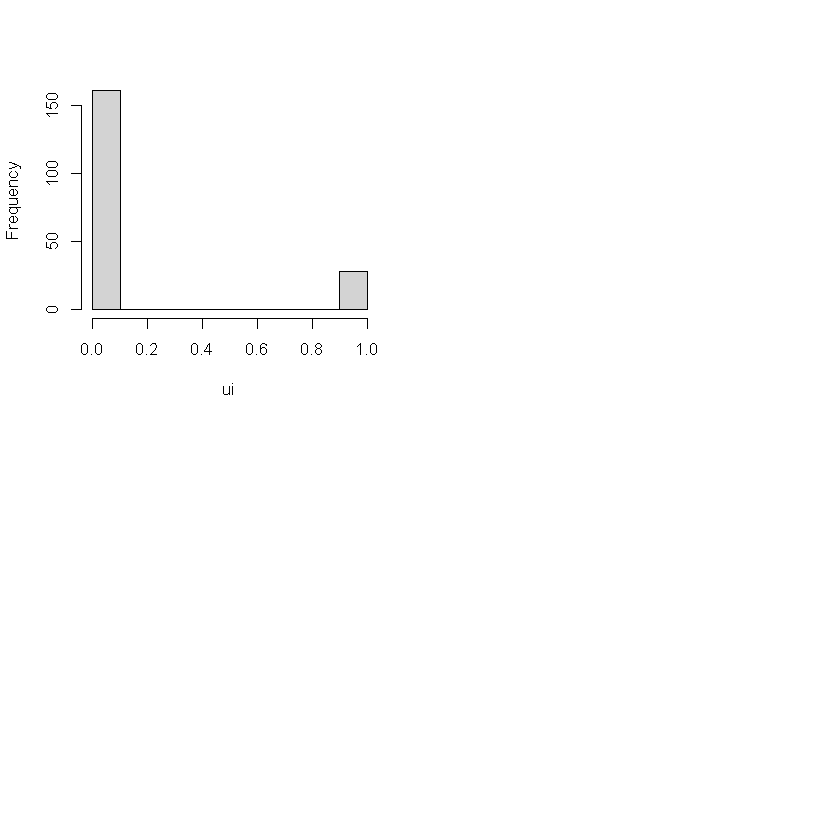

In [312]:
par(mfrow=(c(2,2)))
for (n in names(cats)) {
    hist(cats[[n]], xlab=n, main='')
}

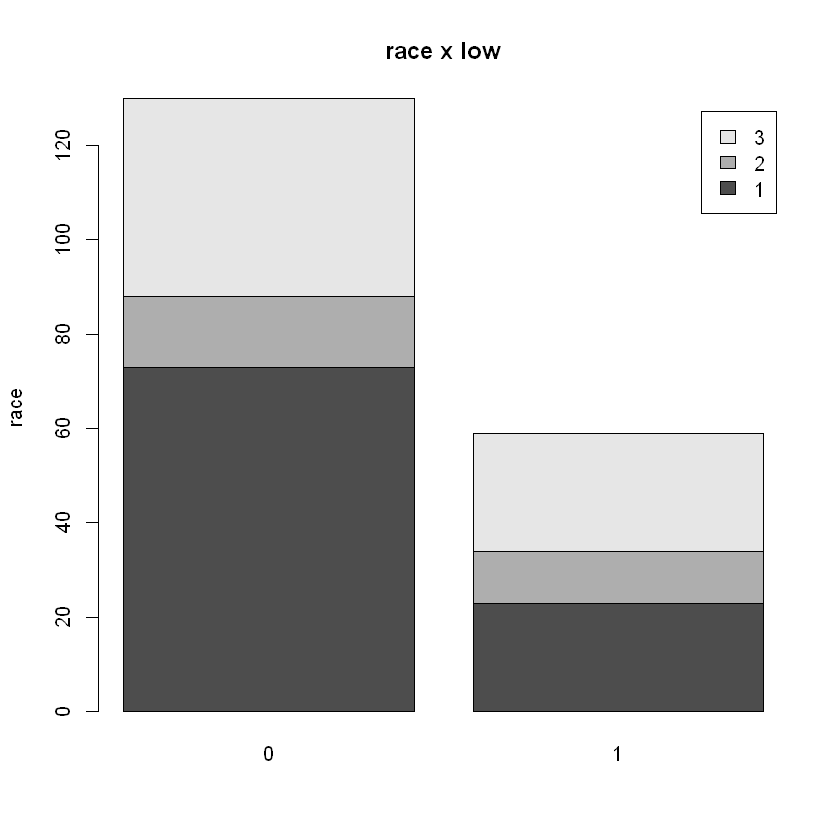

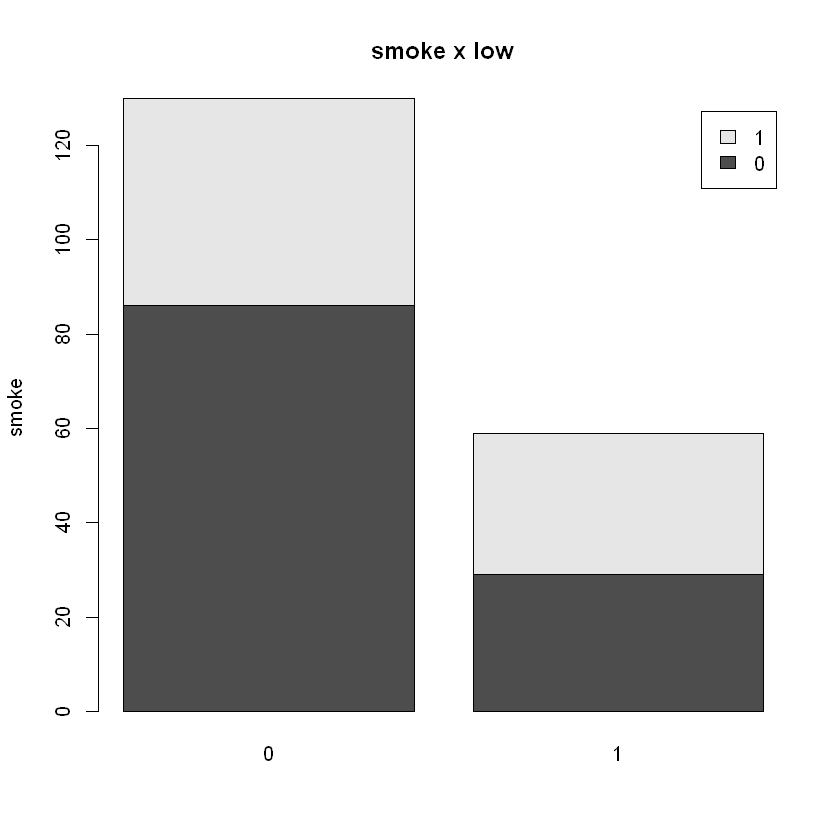

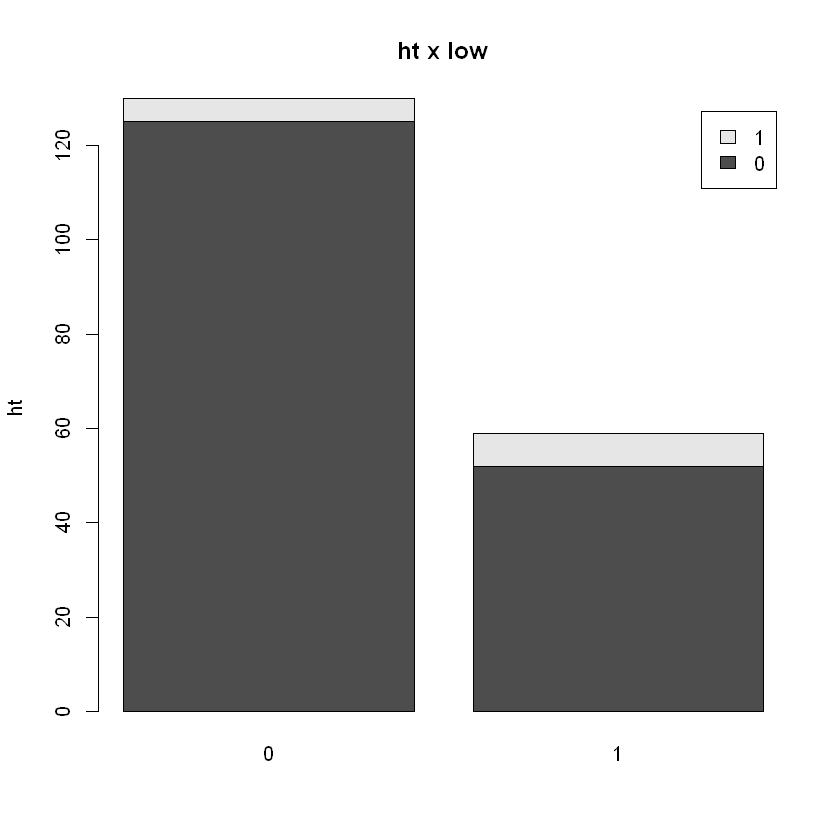

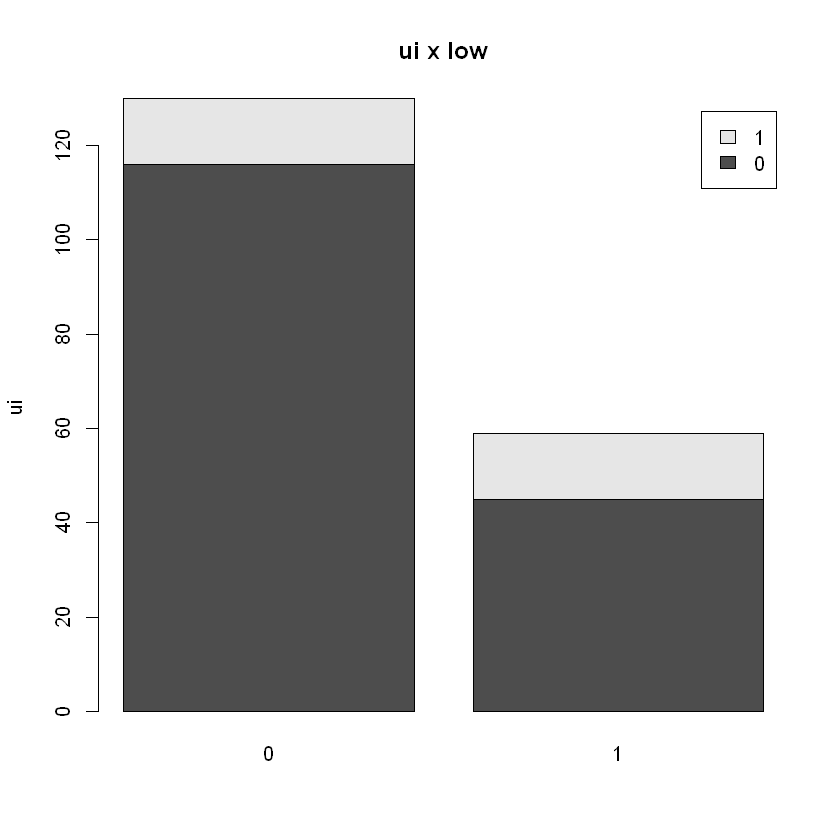

In [390]:
for (n in names(cats[!names(cats) %in% c('low')])) {

    counts <- table(cats[[n]], cats$low)
    barplot(counts, 
            main=glue('{n} x low'), 
            ylab=n,
            horiz=FALSE, 
           # names.arg=c("Not Low", "Low", "Totals"),
            legend = rownames(counts)
    )
}

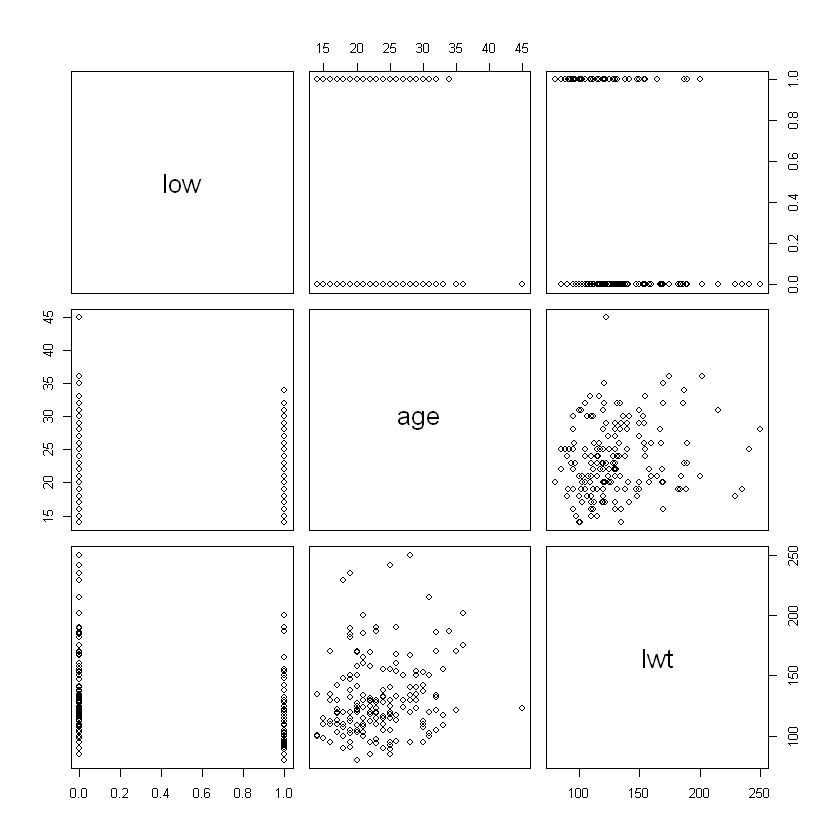

In [417]:
quant <- birthwt[names(birthwt) %in% c('age', 'lwt', 'low')]
plot(quant)

In [491]:
summary(quant)

      low              age             lwt       
 Min.   :0.0000   Min.   :14.00   Min.   : 80.0  
 1st Qu.:0.0000   1st Qu.:19.00   1st Qu.:110.0  
 Median :0.0000   Median :23.00   Median :121.0  
 Mean   :0.3122   Mean   :23.24   Mean   :129.8  
 3rd Qu.:1.0000   3rd Qu.:26.00   3rd Qu.:140.0  
 Max.   :1.0000   Max.   :45.00   Max.   :250.0  

In [479]:
library(dplyr)

samp <- quant
decile <- quantile(samp$age, probs = seq(.1, .9, by = .1))
samp <- cbind(samp, decile) 

age.d <- group_by(samp, decile)
addmargins(table(age.d$decile, age.d$low))

,0,1,Sum
17,15,6,21
19,15,6,21
20,15,6,21
21,15,6,21
23,14,7,21
24,14,7,21
25,14,7,21
28,14,7,21
31,14,7,21
Sum,130,59,189


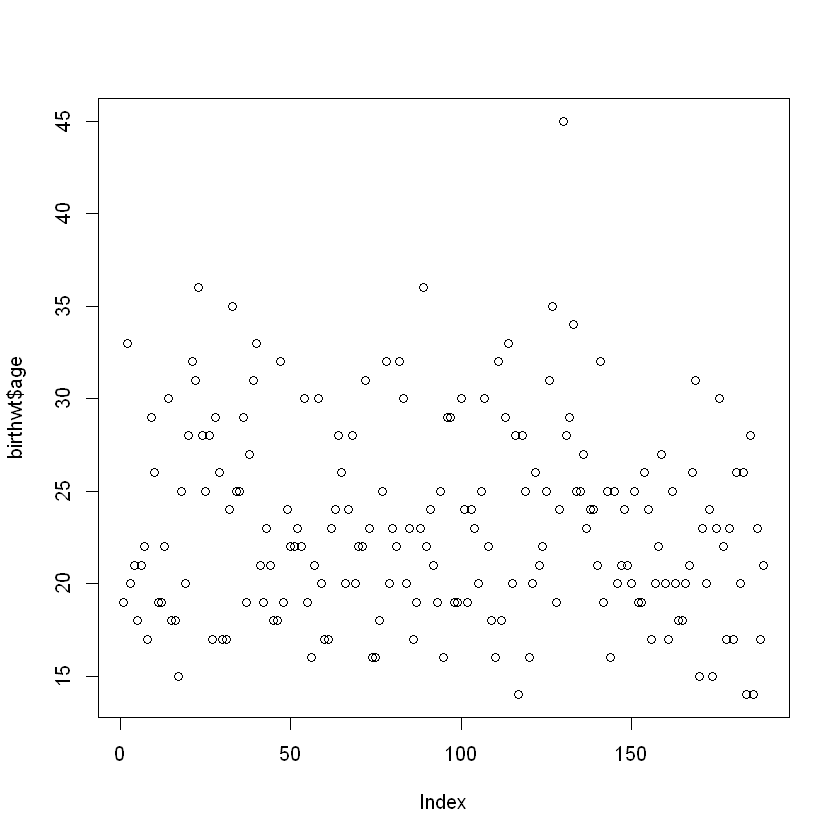

In [495]:
plot(birthwt$age)

In [490]:
mean(quant[quant$low == 1,]$age)
mean(quant[quant$low == 0,]$age)

[1] 22.30508

[1] 23.66154

In [494]:
geri = quant[quant$age >= 35, ]
mean(geri$low)

[1] 0

In [496]:
cor(quant)

,low,age,lwt
low,1.0000000,-0.1189393,-0.1696269
age,-0.1189393,1.0000000,0.1800732
lwt,-0.1696269,0.1800732,1.0000000


## b) 
Fit a logistic regression model using methods discussed in class/the book, similar to as in problem 1).
Be careful to understand each variable in birthwt to avoid including variables that are not logically
acceptable for inclusion in the model.

- smoke, ht: In this case, it is appropriate to consider both smoking and hypertension as both generally point poor overall health. 

- ~age~: Geriatric pregnancies (women over 35) present complications however, our sample includes very few women in that category. Additionally,  age and birthweight appear to be weakly associated. 

- ptl: It seems reasonable (adectedotally) that a mother who has had a number of premature pregnancies, may have a higher likelihood of reocurrence. Premature babies are often have low birth weight. 

- race: As discussed, race may be a proxy to socio-economic conditions which impact health.

- ui: Suprisingly, presence of uterine irritability show some evidence that it could be relevant

- lwt: We found evidence that Mother's weight is also relevant

- ftv: Number of visits may be too complex to interpret categorically, but we can include it in the first pass to assess further



In [502]:
?birthwt

In [501]:
glm.fit = glm(low ~ smoke+ht+ptl+race+ui+lwt+ftv, data=birthwt, family=binomial)
summary(glm.fit)


Call:
glm(formula = low ~ smoke + ht + ptl + race + ui + lwt + ftv, 
    family = binomial, data = birthwt)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8836  -0.8139  -0.5548   1.0434   2.1281  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)   
(Intercept) -0.820493   1.039822  -0.789  0.43007   
smoke        0.954207   0.396083   2.409  0.01599 * 
ht           1.848019   0.696184   2.654  0.00794 **
ptl          0.491009   0.340989   1.440  0.14988   
race         0.473533   0.212848   2.225  0.02610 * 
ui           0.752196   0.460269   1.634  0.10221   
lwt         -0.013099   0.006589  -1.988  0.04683 * 
ftv          0.029847   0.166344   0.179  0.85760   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 234.67  on 188  degrees of freedom
Residual deviance: 205.18  on 181  degrees of freedom
AIC: 221.18

Number of Fisher Scoring iterations: 4

## c) 
What do you notice regarding the variables ptl and ftv. What is your logistic regression model in b)
(perhaps before performing variable selection) implicitly assuming regarding these variables’ effects on
the log odds of giving birth to a low weight baby? Are these assumptions realistic?

- It is confirmed that `ftv` (as-is) is not statistically significant. We also learn that `ptl` (and `ui`) have little significance towards the target. In an additive sense, the model implicitly assumes that are not as useful in predicting low birthweight.

## d) 

Create a new variable for ptl named ptl2 which is more useful for analysis. Keep in mind that with very
small sample sizes, it may be worthwhile to collapse multiple categories.

In [507]:
ptl2 <- ifelse(birthwt$ptl > 0, 1, 0)
birthwt <- cbind(birthwt, ptl2) 

## e) 

Create a new variable for ftv named ftv2 which is more useful for analysis. Keep in mind that with very
small sample sizes, it may be worthwhile to collapse multiple categories. Also, it may be helpful to form
tables which summarize low birthweight probabilities by levels of the variable in order to better understand
the relationship between probability of low birthweight and the newly created variable.

In [509]:
CrossTable(birthwt$ftv , birthwt$low, 
               digits=2, expected=FALSE, 
               prop.r=TRUE, prop.c=FALSE, 
               prop.t=FALSE, prop.chisq=FALSE, 
               sresid=FALSE, format=c("SPSS"))


   Cell Contents
|-------------------------|
|                   Count |
|             Row Percent |
|-------------------------|

Total Observations in Table:  189 

             | birthwt$low 
 birthwt$ftv |        0  |        1  | Row Total | 
-------------|-----------|-----------|-----------|
           0 |       64  |       36  |      100  | 
             |    64.00% |    36.00% |    52.91% | 
-------------|-----------|-----------|-----------|
           1 |       36  |       11  |       47  | 
             |    76.60% |    23.40% |    24.87% | 
-------------|-----------|-----------|-----------|
           2 |       23  |        7  |       30  | 
             |    76.67% |    23.33% |    15.87% | 
-------------|-----------|-----------|-----------|
           3 |        3  |        4  |        7  | 
             |    42.86% |    57.14% |     3.70% | 
-------------|-----------|-----------|-----------|
           4 |        3  |        1  |        4  | 
             |    75.00% |    

In [532]:
ftv2 <- ifelse(birthwt$ftv < 2, 1, 0) # 1 is higher risk, 0 is lower risk
birthwt <- cbind(birthwt, ftv2) 

In [533]:
CrossTable(birthwt$ftv2 , birthwt$low, 
               digits=2, expected=FALSE, 
               prop.r=TRUE, prop.c=FALSE, 
               prop.t=FALSE, prop.chisq=FALSE, 
               sresid=FALSE, format=c("SPSS"))


   Cell Contents
|-------------------------|
|                   Count |
|             Row Percent |
|-------------------------|

Total Observations in Table:  189 

             | birthwt$low 
birthwt$ftv2 |        0  |        1  | Row Total | 
-------------|-----------|-----------|-----------|
           0 |       64  |       36  |      100  | 
             |    64.00% |    36.00% |    52.91% | 
-------------|-----------|-----------|-----------|
           1 |       66  |       23  |       89  | 
             |    74.16% |    25.84% |    47.09% | 
-------------|-----------|-----------|-----------|
Column Total |      130  |       59  |      189  | 
-------------|-----------|-----------|-----------|

 


## f) 

Using the newly created variables in d) and e), reassess the logistic regression model arrived at in b)
(use ftv2 and ptl2 in the modeling). Comment on what you find - are the new versions of these variables
important in predicting low birthweight??

- Originally, it seemed intuitive that number of visits was relevant to capture any early risk signs. I encoded the `ftv2` with the assumption that women with at least 1 visit would be at higher risk. However, there is not enough evidence to support my assumption that `ftv` or `ftv2` are significant. Alternatively, `ptl2` has become statistically significant after applying a simplifying assumption that looks at wether or not a mother has had a previous premature pregnancy. Whereas, the original focused on the count of prior premature pregrancies. Overall, the AIC has reduced and the model shows improvemnt over the previous version.

In [534]:
glm.f2 = glm(low ~ smoke+ht+ptl2+race+lwt+ftv2, data=birthwt, family=binomial)
summary(glm.f2)


Call:
glm(formula = low ~ smoke + ht + ptl2 + race + lwt + ftv2, family = binomial, 
    data = birthwt)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7391  -0.8235  -0.5461   0.9609   2.3074  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)   
(Intercept) -0.422543   1.093174  -0.387  0.69911   
smoke        0.822827   0.409409   2.010  0.04445 * 
ht           1.746560   0.707569   2.468  0.01357 * 
ptl2         1.255182   0.448369   2.799  0.00512 **
race         0.420340   0.219847   1.912  0.05588 . 
lwt         -0.013914   0.006717  -2.072  0.03830 * 
ftv2        -0.225037   0.361864  -0.622  0.53402   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 234.67  on 188  degrees of freedom
Residual deviance: 202.90  on 182  degrees of freedom
AIC: 216.9

Number of Fisher Scoring iterations: 4


## g) 

In a manner similar to the approach used in the book, split the birthwt data into a training and test set,
where the test set is about 20% the size of the entire dataset. Then, using variables that are justifiable for
inclusion in discriminant analysis, fit LDA and QDA models to the training set and form confusion
matrices, calculate the sensitivity, specificity, and the accuracy of each method using the test set, and do
the same for the logistic regression models built in f) and b). Which model performs the best? Remember
you MUST set the seed using the TeachingDemos package in a manner similar to as done in the notes
(but don’t use my name to set the seed!)

GLM:
  - Although, the final logistic regression had a lower AIC, both models (with and without `ftv2`) performed identically.
  - Type II error - the model has good sensitivity as it can predict true low birth weights 96% of the time.
  - Type I error - the model has poor specificity only correctly identifying normal birth weights at a rate of 18%.
  
LDA:
  - Type II error - the model has acceptable sensitivity as it can predict true low birth weights 88% of the time.
  - Type I error - the model has poor specificity only correctly identifying normal birth weights at a rate of 36%.
  
QDA: 
  - QDA and LDA have identical performance
    
Overall, the logistic regression performed better than both LDA and QDA. This suggests that true decision boundaries are highly linear and that the assumptions for LDA are not entirely met.

In [584]:
set.seed(123)

smp_size = floor(0.8 * nrow(birthwt))

len = length(birthwt$low)
train_ind= sample(len, (len * .8))
train = birthwt[train_ind,]
test = birthwt[-train_ind, ]

In [647]:
glm.f3 = glm(low ~ smoke+ht+ptl2+race+lwt, data=train, family=binomial)
summary(glm.f3)


Call:
glm(formula = low ~ smoke + ht + ptl2 + race + lwt, family = binomial, 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7470  -0.8417  -0.4969   0.9397   2.2039  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)  
(Intercept) -1.126861   1.249380  -0.902   0.3671  
smoke        1.087562   0.469460   2.317   0.0205 *
ht           1.739567   0.855484   2.033   0.0420 *
ptl2         1.202243   0.480178   2.504   0.0123 *
race         0.630333   0.250417   2.517   0.0118 *
lwt         -0.013332   0.007944  -1.678   0.0933 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 188.83  on 150  degrees of freedom
Residual deviance: 160.71  on 145  degrees of freedom
AIC: 172.71

Number of Fisher Scoring iterations: 4


In [610]:
metrics <- function(cm) {
    TP = cm[1]
    FN = cm[2] # Type II
    FP = cm[3] # Type I
    TN = cm[4]

    err = (FP + FN)/(TP+TN+FN+FP)
    
    sensitivity = TP/(FN+TP) # recall
    # FNR = FN/(TP+FN)
    
    specificity = TN/(TN+FP)
    # FPR = FP/(FP+TN)
    
    print(glue('Error: {err}'))
    print(glue('Sensitivity: {sensitivity}'))
    print(glue('Specificity: {specificity}'))
}

In [630]:
library(pROC)

y_test = test$low
X_test = test[,!(names(test) %in% c('low'))]

In [639]:
glm2.probs = predict(glm.f2, X_test)
glm2.pred = rep(0, length(y_test))
glm2.pred[glm2.probs > 0.5] = 1

glm2.cm = table(glm2.pred, y_test)
glm2.cm

auc(glm2.pred, y_test)

metrics(glm2.cm)

         y_test
glm2.pred  0  1
        0 26  9
        1  1  2

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.7048

Error: 0.263157894736842
Sensitivity: 0.962962962962963
Specificity: 0.181818181818182


In [640]:
glm3.probs = predict(glm.f3, X_test)
glm3.pred = rep(0, length(y_test))
glm3.pred[glm3.probs > 0.5] = 1

glm3.cm = table(glm3.pred, y_test)
glm3.cm

auc(glm3.pred, y_test)

metrics(glm3.cm)

         y_test
glm3.pred  0  1
        0 26  9
        1  1  2

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.7048

Error: 0.263157894736842
Sensitivity: 0.962962962962963
Specificity: 0.181818181818182


In [641]:
lda.fit = lda(low ~ smoke+ht+ptl2+race+lwt, data=train)
lda.pred = predict(lda.fit, X_test)$class

lda.cm = table(lda.pred, y_test)
lda.cm

auc(lda.pred, y_test)

metrics(lda.cm)

        y_test
lda.pred  0  1
       0 24  7
       1  3  4

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.6728

Error: 0.263157894736842
Sensitivity: 0.888888888888889
Specificity: 0.363636363636364


In [642]:
qda.fit = qda(low ~ smoke+ht+ptl2+race+lwt, data=train)
qda.pred = predict(qda.fit, X_test)$class

qda.cm = table(qda.pred, y_test)
qda.cm

auc(qda.pred, y_test)

metrics(qda.cm)

        y_test
qda.pred  0  1
       0 24  7
       1  3  4

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.6728

Error: 0.263157894736842
Sensitivity: 0.888888888888889
Specificity: 0.363636363636364


# 3) 

Consider the following function below. This function is created to count the number of 2s in a numeric
vector of length 1 or greater.

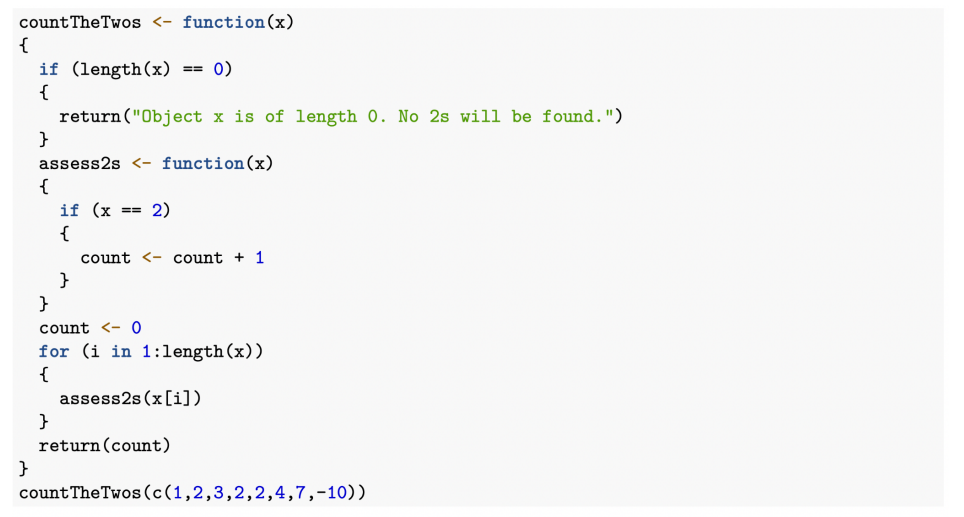

In [812]:
countTheTwos <- function(x) {
    if (length(x) == 0) {
        return ("Object x is of length 0. No 2s will be found.")
    }
    
    assess2s <- function(x) {
        if (x==2) {
            # count <- count+1
            assign(deparse( substitute(count) ) , count + 1, , envir = .GlobalEnv)
        }
    }
    
    assign(deparse( substitute(count) ) , 0, envir = .GlobalEnv)
    for (i in 1:length(x)) {
        assess2s(x[i])
    }
    return (count)
}

countTheTwos(c(1,2,3,2,2,4,7,-10))

[1] 3

Make a very small modification to the function above using the assign function in order to make the
function work correctly. Run your countTheTwos() functon with argument c(1,2,3,2,2,4,7,-10) when
finished.

- When only modifying using assign, we add count the global environment variable scope

## 4) 

In continuation of 3), assume that assess2() is defined in the global environment:
Make minor modification to the above function so that it will also work as in 3). You will still need a similar
modification as you used in 3) to make this work, but must also add an additional modification. Run your
countTheTwos() functon with argument c(1,2,3,2,2,4,7,-10) when finished.

In [821]:
countTheTwos <- function(x) {
    if (length(x) == 0) {
        return ("Object x is of length 0. No 2s will be found.")
    }
    assign(deparse( substitute(count) ) , 0, envir = .GlobalEnv)
    for (i in 1:length(x)) {
        assess2s(x[i])
    }
    return (count)
}

assess2s <- function(x) {
    if (x==2) {
        # count <- count+1
        assign(deparse( substitute(count) ) , count + 1, , envir = .GlobalEnv)
    }
}

countTheTwos(c(1,2,3,2,2,4,7,-10))

[1] 3

## 5) 

Why not use superassignment, i.e. «-, in 4)?

In [1008]:
countTheTwos <- function(x) {
    if (length(x) == 0) {
        return ("Object x is of length 0. No 2s will be found.")
    }
    count <<- 0
    for (i in 1:length(x)) {
        assess2s(x[i])
    }
    return (count)
}

assess2s <- function(x) {
    if (x==2) {
        count <<- count+1
    }
}

countTheTwos(c(1,2,3,2,2,4,7,-10))

[1] 3